In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Загрузка данных
data = pd.read_excel('/content/combined_reviews_with_labels2.xlsx')  # Укажите путь к файлу с данными

In [ ]:
# Просмотр структуры данных
print("\nПример данных:")
data.head()


Пример данных:


,Index,Review,label
0,1,"Была на выставке Васнецовы. Люблю Третьяковку,...",1
1,2,Всё лучшее в живописи и классическом искусстве...,1
2,3,Великолепная коллекция русского авангарда. Неп...,1
3,4,Отличное культурное пространство. Были на осно...,0
4,5,"Большая, серьезная, просторная, тихая, взросла...",1


In [ ]:
print("\nИнформация о данных:")
data.info()


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   1470 non-null   int64 
 1   Review  1470 non-null   object
 2   label   1470 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.6+ KB


In [ ]:
# Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
print("\nПропущенные значения:")
print(missing_values)


Пропущенные значения:
Index     0
Review    0
label     0
dtype: int64


In [ ]:
# Распределение меток (баланс классов)
label_counts = data['label'].value_counts()
print("\nРаспределение меток:")
print(label_counts)


Распределение меток:
label
1    771
0    699
Name: count, dtype: int64


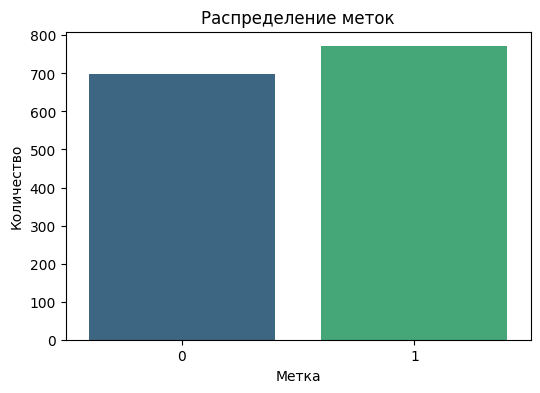

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, dodge=False, palette="viridis", legend=False)
plt.title("Распределение меток")
plt.xlabel("Метка")
plt.ylabel("Количество")
plt.show()

In [ ]:
# Очистка текста
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Удаление HTML-тегов
    text = re.sub(r'[^a-zA-Zа-яА-Я ]', '', text)  # Удаление цифр и спецсимволов
    text = text.lower()  # Приведение к нижнему регистру
    return text

data['cleaned_review'] = data['Review'].apply(clean_text)



Статистика длины отзывов:
count    1470.000000
mean       36.963946
std        48.335727
min         1.000000
25%        10.000000
50%        24.000000
75%        45.000000
max       817.000000
Name: review_length, dtype: float64


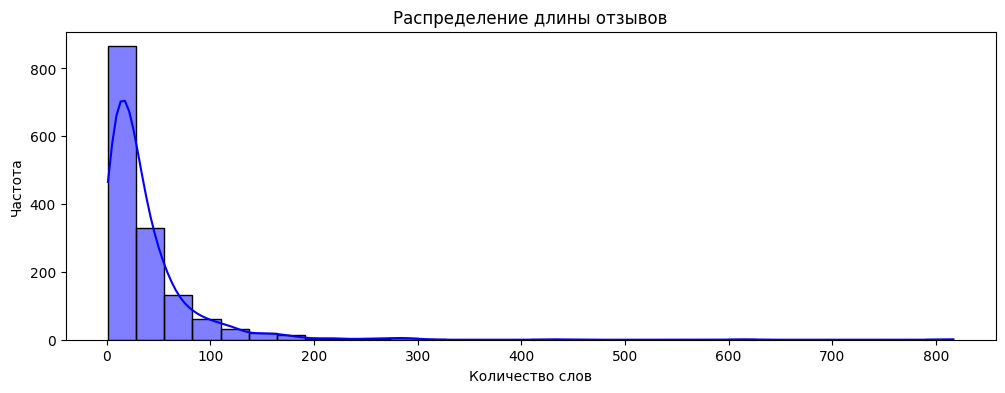

In [ ]:
# Длина отзывов
data['review_length'] = data['cleaned_review'].apply(lambda x: len(x.split()))
print("\nСтатистика длины отзывов:")
print(data['review_length'].describe())

plt.figure(figsize=(12, 4))
sns.histplot(data['review_length'], bins=30, kde=True, color='blue')
plt.title("Распределение длины отзывов")
plt.xlabel("Количество слов")
plt.ylabel("Частота")
plt.show()


Топ-20 самых частотных слов:
[('очень', 556), ('это', 362), ('выставки', 341), ('выставка', 240), ('выставке', 197), ('картины', 184), ('выставку', 184), ('место', 160), ('билеты', 129), ('просто', 128), ('васнецовых', 126), ('картин', 122), ('кафе', 120), ('экспозиции', 117), ('искусство', 103), ('понравилось', 101), ('интересные', 99), ('рекомендую', 97), ('искусства', 94), ('века', 93)] 



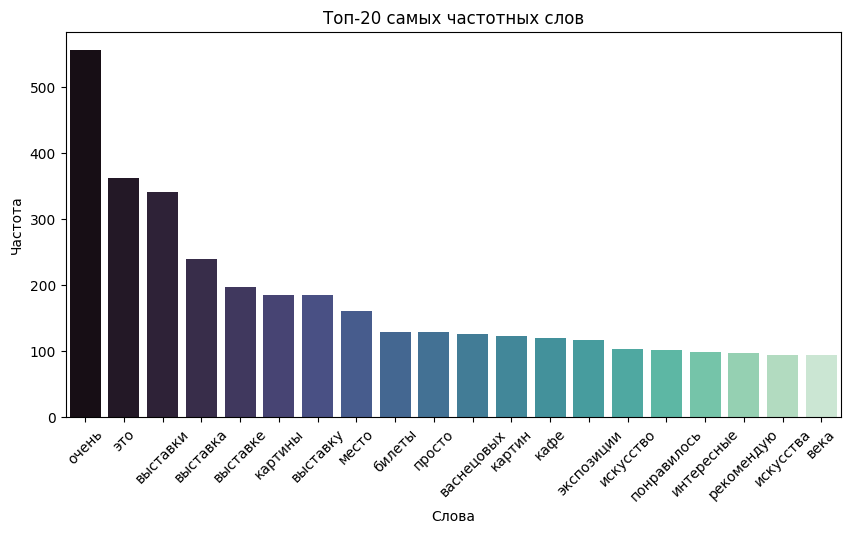

In [ ]:
# Частотный анализ слов
stop_words = set(stopwords.words('russian') + stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data['tokens'] = data['cleaned_review'].apply(tokenize_and_remove_stopwords)

# Общие частотные слова
all_words = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(20)

print("\nТоп-20 самых частотных слов:")
print(word_freq, "\n")

plt.figure(figsize=(10, 5))
words, counts = zip(*word_freq)
sns.barplot(x=list(words), y=list(counts), hue=list(words), palette="mako", legend=False)
plt.title("Топ-20 самых частотных слов")
plt.xlabel("Слова")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

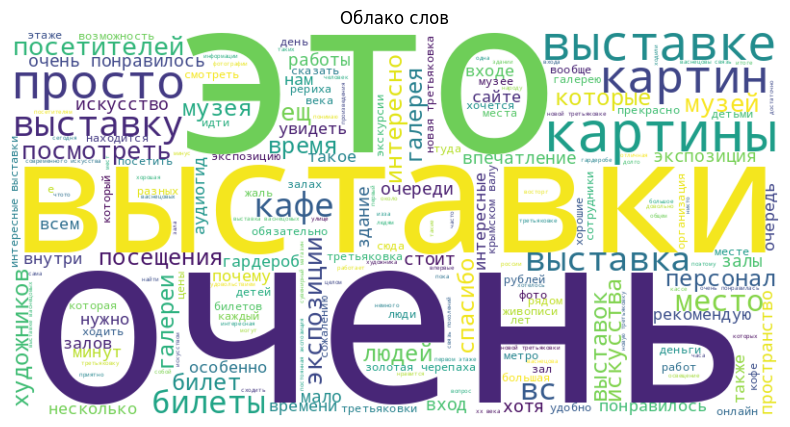

In [ ]:
# Облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако слов")
plt.show()


Топ-20 биграмм:
[(('очень', 'понравилось'), 53), (('золотая', 'черепаха'), 39), (('интересные', 'выставки'), 33), (('крымском', 'валу'), 33), (('новая', 'третьяковка'), 30), (('новой', 'третьяковке'), 26), (('xx', 'века'), 25), (('связь', 'поколений'), 25), (('современного', 'искусства'), 25), (('выставка', 'васнецовых'), 25), (('постоянная', 'экспозиция'), 24), (('очень', 'понравилась'), 24), (('новой', 'третьяковки'), 23), (('новую', 'третьяковку'), 23), (('выставке', 'васнецовых'), 23), (('первом', 'этаже'), 23), (('сувенирный', 'магазин'), 22), (('васнецовы', 'связь'), 22), (('очень', 'интересно'), 21), (('отличное', 'место'), 21)] 



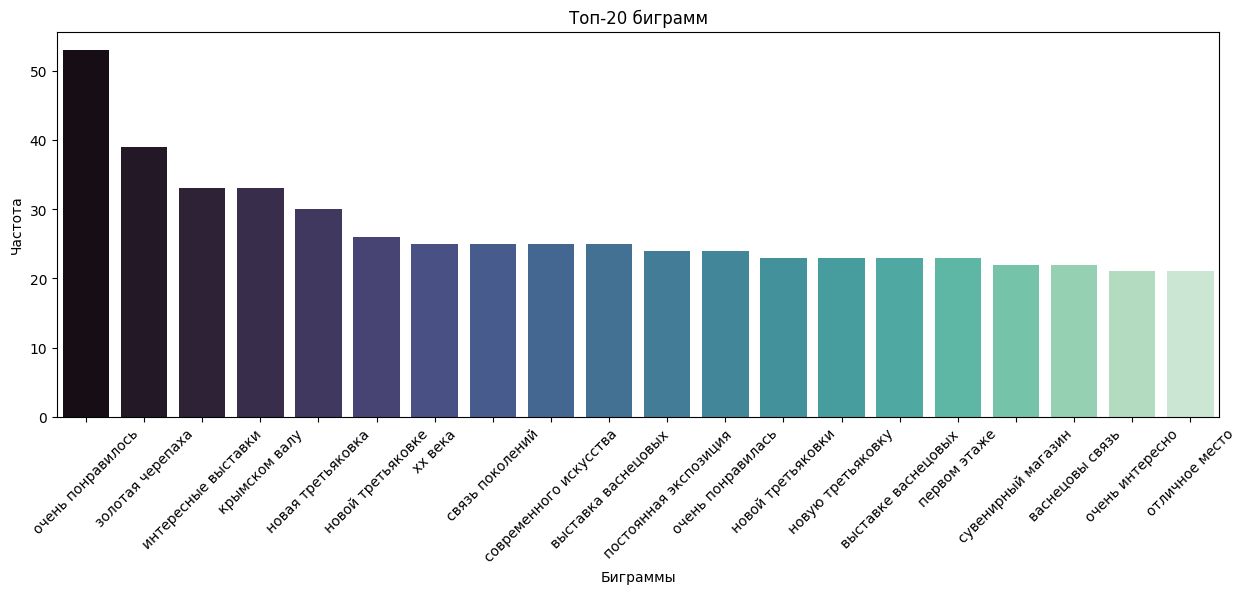

In [ ]:
# Анализ биграмм
bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams).most_common(20)

print("\nТоп-20 биграмм:")
print(bigram_freq, "\n")

plt.figure(figsize=(15, 5))
bigrams, bigram_counts = zip(*bigram_freq)
bigrams = [' '.join(bigram) for bigram in bigrams]
sns.barplot(x=bigrams, y=bigram_counts, hue=bigrams, palette="mako")
plt.title("Топ-20 биграмм")
plt.xlabel("Биграммы")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()


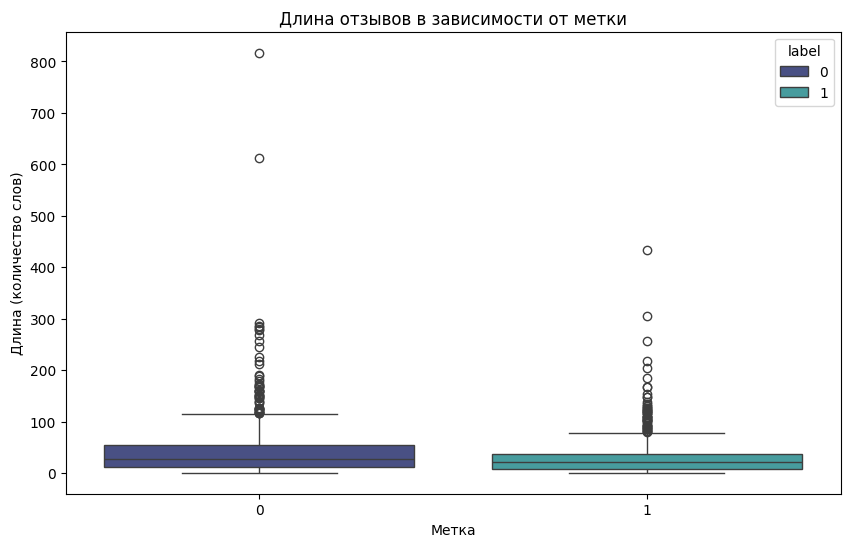

In [ ]:
# Длина отзывов в зависимости от метки с использованием hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='review_length', data=data, hue='label', palette="mako")
plt.title("Длина отзывов в зависимости от метки")
plt.xlabel("Метка")
plt.ylabel("Длина (количество слов)")
plt.show()